In [1]:
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
from napari_simpleitk_image_processing import threshold_otsu, median_filter, gaussian_blur, signed_maurer_distance_map,\
    morphological_watershed, morphological_watershed, connected_component_labeling, \
    touching_objects_labeling, watershed_otsu_labeling, binary_fill_holes

In [2]:
blobs = imread('https://samples.fiji.sc/blobs.png')
blobs

array([[ 40,  32,  24, ..., 216, 200, 200],
       [ 56,  40,  24, ..., 232, 216, 216],
       [ 64,  48,  24, ..., 240, 232, 232],
       ...,
       [ 72,  80,  80, ...,  48,  48,  48],
       [ 80,  80,  80, ...,  48,  48,  48],
       [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)

## Median filter

StackViewNDArray([[ 40,  40,  32, ..., 232, 232, 232],
                  [ 40,  40,  32, ..., 232, 232, 232],
                  [ 40,  40,  32, ..., 232, 232, 232],
                  ...,
                  [ 72,  72,  72, ...,  48,  48,  48],
                  [ 72,  72,  72, ...,  48,  48,  48],
                  [ 80,  72,  72, ...,  48,  48,  48]], dtype=uint8)
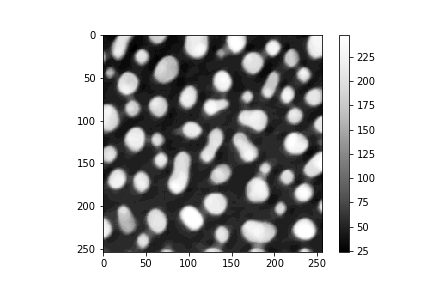
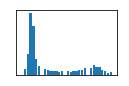

In [3]:
median_filter(blobs, 5, 5, 0)

# Gaussian blur

StackViewNDArray([[ 36,  34,  33, ..., 225, 221, 218],
                  [ 37,  35,  34, ..., 227, 224, 221],
                  [ 37,  36,  35, ..., 229, 227, 224],
                  ...,
                  [ 74,  73,  71, ...,  47,  47,  47],
                  [ 77,  76,  74, ...,  47,  47,  47],
                  [ 80,  78,  76, ...,  47,  47,  47]], dtype=uint8)
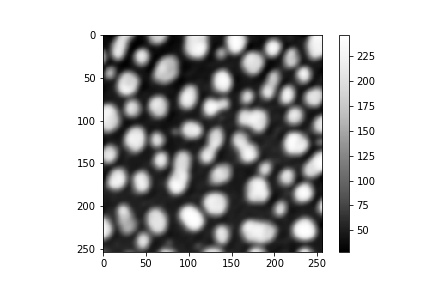
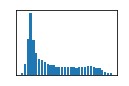

In [4]:
gaussian_blur(blobs, 10, 10, 0)

## Threshold Otsu

StackViewNDArray([[0, 0, 0, ..., 1, 1, 1],
                  [0, 0, 0, ..., 1, 1, 1],
                  [0, 0, 0, ..., 1, 1, 1],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
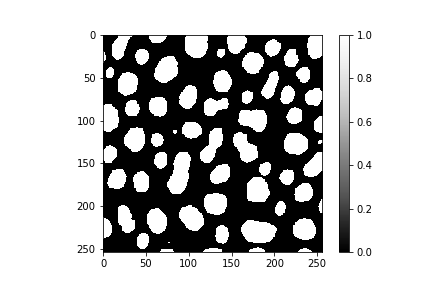
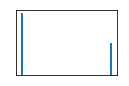

In [5]:
from napari_simpleitk_image_processing import threshold_otsu
binary = threshold_otsu(blobs)
binary

StackViewNDArray([[0, 0, 0, ..., 4, 3, 3],
                  [0, 0, 0, ..., 4, 4, 4],
                  [1, 0, 0, ..., 4, 4, 4],
                  ...,
                  [1, 1, 1, ..., 0, 0, 0],
                  [1, 1, 1, ..., 0, 0, 0],
                  [1, 1, 1, ..., 0, 0, 0]], dtype=uint8)
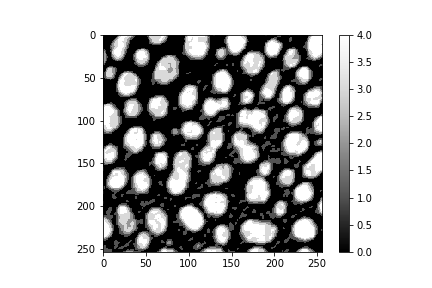
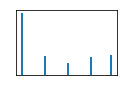

In [6]:
from napari_simpleitk_image_processing import otsu_multiple_thresholds
otsu_multiple_thresholds(blobs, number_of_thresholds=4)

## Distance Map

StackViewNDArray([[-15.264338 , -14.422205 , -13.601471 , ...,
                    11.       ,  12.       ,  13.       ],
                  [-14.764823 , -13.892444 , -13.038404 , ...,
                    11.       ,  12.       ,  13.       ],
                  [-14.3178215, -13.416408 , -12.529964 , ...,
                    11.045361 ,  12.0415945,  13.038404 ],
                  ...,
                  [-13.       , -13.038404 , -13.152946 , ...,
                   -11.18034  , -12.165525 , -13.152946 ],
                  [-14.       , -14.035668 , -14.142136 , ...,
                   -11.045361 , -12.0415945, -13.038404 ],
                  [-15.       , -15.033297 , -15.132746 , ...,
                   -11.       , -12.       , -13.       ]], dtype=float32)
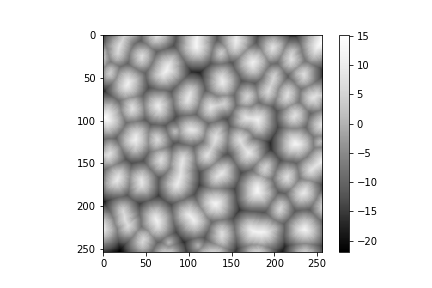
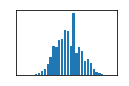

In [7]:
distance_image = signed_maurer_distance_map(binary)
distance_image

## Morphological Watershed

StackViewNDArray([[ 1,  1,  1, ...,  4,  4,  4],
                  [ 1,  1,  1, ...,  4,  4,  4],
                  [ 1,  1,  1, ...,  4,  4,  4],
                  ...,
                  [69, 69, 69, ..., 65, 65, 65],
                  [69, 69, 69, ..., 65, 65, 65],
                  [69, 69, 69, ..., 65, 65, 65]], dtype=uint32)
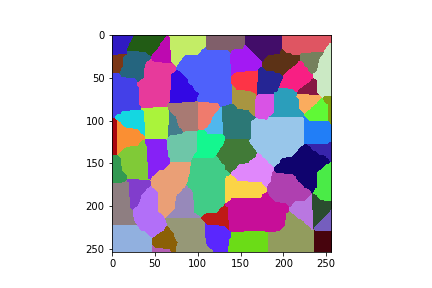

In [8]:
morphological_watershed(distance_image)

## Connected component labeling

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
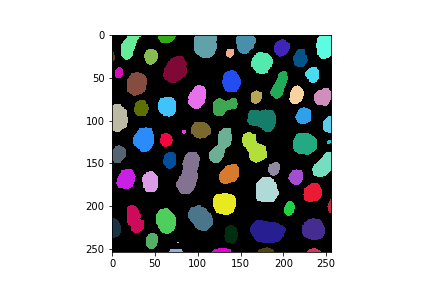

In [9]:
connected_component_labeling(binary)

## Touching objects labeling

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
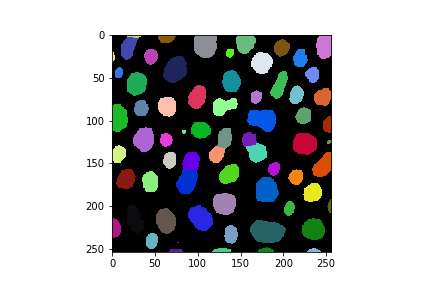

In [10]:
touching_labels = touching_objects_labeling(binary)
touching_labels


## Watershed-Otsu-Labeling

StackViewNDArray([[0, 0, 0, ..., 6, 6, 6],
                  [0, 0, 0, ..., 6, 6, 6],
                  [0, 0, 0, ..., 6, 6, 6],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
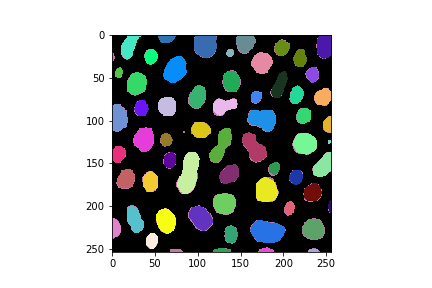

In [11]:
labels = watershed_otsu_labeling(blobs)
labels

## Simple linear iterative clustering

StackViewNDArray([[  0,   0,   0, ...,  16,  16,  16],
                  [  0,   0,   0, ...,  16,  16,  16],
                  [  0,   0,   0, ...,  16,  16,  16],
                  ...,
                  [255, 255, 255, ..., 271, 271, 271],
                  [255, 255, 255, ..., 271, 271, 271],
                  [255, 255, 255, ..., 271, 271, 271]], dtype=uint32)
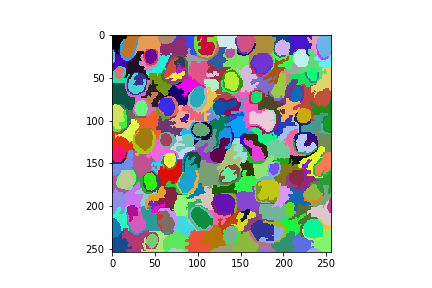

In [12]:
from napari_simpleitk_image_processing import simple_linear_iterative_clustering
simple_linear_iterative_clustering(blobs, grid_size_x=15, grid_size_y=15)

## Scalar image K-means clustering

StackViewNDArray([[0, 0, 0, ..., 1, 1, 1],
                  [0, 0, 0, ..., 1, 1, 1],
                  [0, 0, 0, ..., 1, 1, 1],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
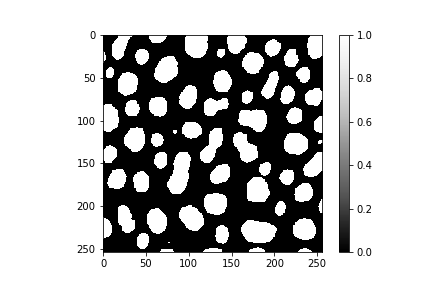
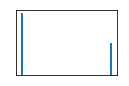

In [13]:
from napari_simpleitk_image_processing import scalar_image_k_means_clustering
scalar_image_k_means_clustering(blobs)

## Label post-processing

StackViewNDArray([[ 0,  0,  0, ..., 16, 16, 16],
                  [ 0,  0,  0, ..., 16, 16, 16],
                  [ 0,  0,  0, ..., 16, 16, 16],
                  ...,
                  [ 0,  0,  0, ...,  0,  0,  0],
                  [ 0,  0,  0, ...,  0,  0,  0],
                  [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
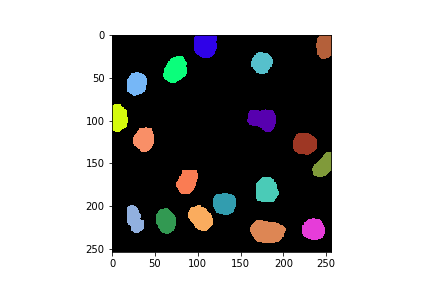

In [14]:
from napari_simpleitk_image_processing import relabel_component
relabel_component(touching_labels, minimumObjectSize=450)

## Label contours

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
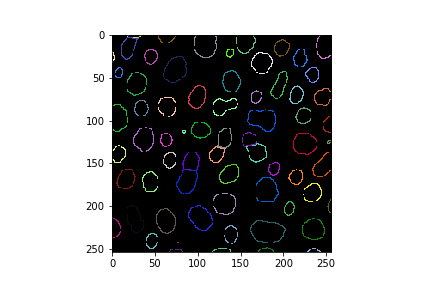

In [15]:
from napari_simpleitk_image_processing import label_contour
label_contour(touching_labels)

## Label statistics

In [16]:
from napari_simpleitk_image_processing import label_statistics
regionprops = label_statistics(blobs, labels, True, True, True, True, True, True)
regionprops.keys()

Index(['label', 'maximum', 'mean', 'median', 'minimum', 'sigma', 'sum',
       'variance', 'bbox_0', 'bbox_1', 'bbox_2', 'bbox_3', 'centroid_0',
       'centroid_1', 'elongation', 'feret_diameter', 'flatness', 'roundness',
       'equivalent_ellipsoid_diameter_0', 'equivalent_ellipsoid_diameter_1',
       'equivalent_spherical_perimeter', 'equivalent_spherical_radius',
       'number_of_pixels', 'number_of_pixels_on_border', 'perimeter',
       'perimeter_on_border', 'perimeter_on_border_ratio', 'principal_axes0',
       'principal_axes1', 'principal_axes2', 'principal_axes3',
       'principal_moments0', 'principal_moments1'],
      dtype='object')

In [17]:
regionprops

,label,maximum,mean,median,minimum,sigma,sum,variance,bbox_0,bbox_1,...,number_of_pixels_on_border,perimeter,perimeter_on_border,perimeter_on_border_ratio,principal_axes0,principal_axes1,principal_axes2,principal_axes3,principal_moments0,principal_moments1
0,1,224.0,137.526132,136.0,112.0,13.360739,157880.0,178.509343,0,0,...,36,2461.579651,36.0,0.014625,-0.574118,-0.818773,0.818773,-0.574118,5063.911496,5560.184284
1,2,232.0,193.014354,200.0,128.0,28.559077,80680.0,815.620897,11,0,...,16,85.499572,16.0,0.187135,0.902494,0.430703,-0.430703,0.902494,17.056706,72.884853
2,3,224.0,179.846995,184.0,128.0,21.328889,32912.0,454.921516,53,0,...,21,53.456120,21.0,0.392846,-0.042759,-0.999085,0.999085,-0.042759,8.637199,27.432794
3,4,248.0,207.082171,216.0,120.0,27.772832,133568.0,771.330194,95,0,...,23,93.409370,23.0,0.246228,0.991601,0.129334,-0.129334,0.991601,48.975064,55.851742
4,5,248.0,223.146402,232.0,128.0,30.246515,89928.0,914.851647,144,0,...,19,74.218143,19.0,0.256002,0.974707,0.223487,-0.223487,0.974707,32.059800,33.765222
5,6,248.0,214.906725,224.0,128.0,26.386796,99072.0,696.263020,238,0,...,39,80.787183,40.0,0.495128,0.999408,0.034407,-0.034407,0.999408,23.320204,59.820502
6,7,248.0,211.565891,224.0,136.0,30.197236,54584.0,911.873073,189,7,...,0,57.938471,0.0,0.000000,0.932037,0.362364,-0.362364,0.932037,18.705896,22.720115
7,8,200.0,166.171429,168.0,136.0,16.466894,11632.0,271.158592,133,17,...,0,29.917295,0.0,0.000000,0.960385,0.278678,-0.278678,0.960385,4.741825,6.584094
8,9,224.0,176.932331,176.0,128.0,24.022064,47064.0,577.059555,211,17,...,0,59.834590,0.0,0.000000,0.997651,0.068495,-0.068495,0.997651,14.969363,30.395186
9,10,240.0,191.598174,200.0,128.0,28.239851,41960.0,797.489171,37,18,...,0,53.360835,0.0,0.000000,0.992904,0.118917,-0.118917,0.992904,15.331341,19.871929


## Edge enhancement / edge detection

StackViewNDArray([[  8.,   8.,   8., ...,  16.,  32.,  16.],
                  [-24.,   0.,  16., ..., -16.,  16.,   0.],
                  [-48., -24.,  40., ..., -16.,  -8., -16.],
                  ...,
                  [  8., -16.,  -8., ...,   0.,   0.,   0.],
                  [  8.,   8.,   0., ...,   0.,   0.,   0.],
                  [-24.,  -8.,   8., ...,   0.,   0.,   0.]])
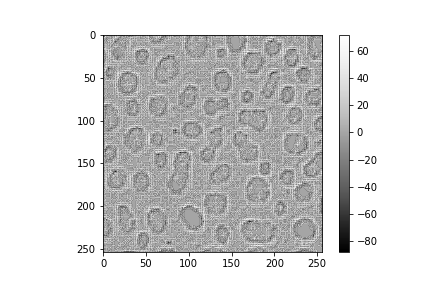
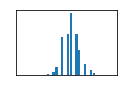

In [18]:
from napari_simpleitk_image_processing import laplacian_filter
laplacian_filter(blobs)

StackViewNDArray([[ 0.04143169,  0.03739895,  0.03302537, ...,
                   -0.13799646, -0.14374909, -0.14888938],
                  [ 0.03790184,  0.03396917,  0.02970707, ...,
                   -0.1393942 , -0.14508256, -0.15016647],
                  [ 0.03421452,  0.03039436,  0.02625637, ...,
                   -0.14042452, -0.14603451, -0.15104878],
                  ...,
                  [ 0.03438915,  0.03680093,  0.03920772, ...,
                    0.01475119,  0.02091116,  0.02687691],
                  [ 0.03811312,  0.04037919,  0.04263743, ...,
                    0.01406322,  0.02019631,  0.02613378],
                  [ 0.04134034,  0.04346982,  0.04558875, ...,
                    0.01325303,  0.01936782,  0.02528556]], dtype=float32)
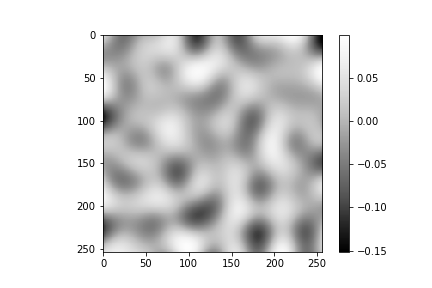
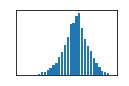

In [19]:
from napari_simpleitk_image_processing import laplacian_of_gaussian_filter
laplacian_of_gaussian_filter(blobs, sigma=20)

StackViewNDArray([[ 68.81860214,  86.16263691,  40.79215611, ...,
                   132.42356286,  90.50966799,  64.        ],
                  [104.30723848, 132.42356286,  60.92618485, ...,
                   124.45079349, 132.42356286, 128.        ],
                  [ 67.88225099, 120.26637103,  57.68882041, ...,
                    68.81860214,  68.81860214,  64.        ],
                  ...,
                  [ 60.92618485,  46.64761516,  32.        , ...,
                     0.        ,   0.        ,   0.        ],
                  [ 80.        ,  40.79215611,  11.3137085 , ...,
                     0.        ,   0.        ,   0.        ],
                  [ 60.92618485,  57.68882041,  25.29822128, ...,
                     0.        ,   0.        ,   0.        ]])
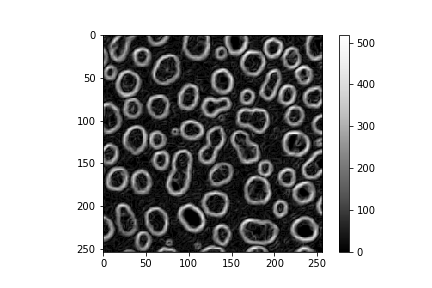
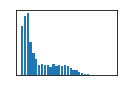

In [20]:
from napari_simpleitk_image_processing import sobel
sobel(blobs)

StackViewNDArray([[ 8.944272,  8.944272,  4.      , ..., 17.888544,
                   11.313708,  8.      ],
                  [14.422205, 17.888544,  8.      , ..., 16.970562,
                   17.888544, 16.      ],
                  [11.313708, 20.      ,  8.944272, ...,  5.656854,
                    8.944272,  8.      ],
                  ...,
                  [ 8.944272,  5.656854,  4.      , ...,  0.      ,
                    0.      ,  0.      ],
                  [12.      ,  4.      ,  0.      , ...,  0.      ,
                    0.      ,  0.      ],
                  [ 8.944272,  8.944272,  4.      , ...,  0.      ,
                    0.      ,  0.      ]], dtype=float32)
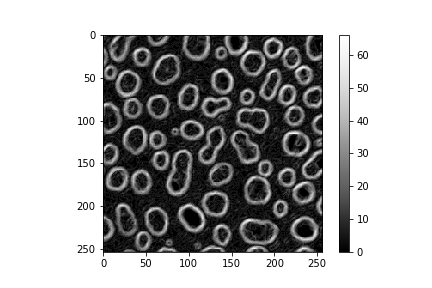
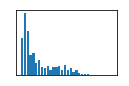

In [21]:
from napari_simpleitk_image_processing import gradient_magnitude
gradient_magnitude(blobs)

StackViewNDArray([[48, 48, 48, ..., 48, 48, 48],
                  [48, 48, 48, ..., 48, 48, 48],
                  [48, 48, 48, ..., 48, 48, 48],
                  ...,
                  [40, 40, 40, ..., 16, 16,  8],
                  [32, 40, 40, ..., 16,  8,  8],
                  [32, 32, 40, ...,  8,  0,  0]], dtype=uint8)
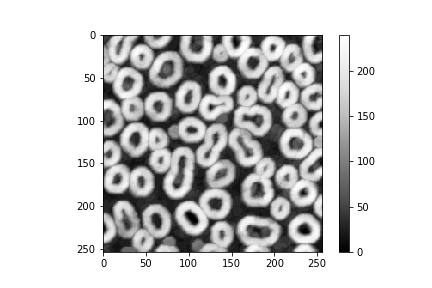
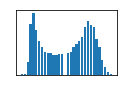

In [22]:
from napari_simpleitk_image_processing import morphological_gradient
morphological_gradient(blobs)

StackViewNDArray([[12, 11, 11, ..., 17, 17, 17],
                  [12, 12, 11, ..., 16, 16, 16],
                  [12, 12, 11, ..., 15, 15, 15],
                  ...,
                  [13, 12, 12, ...,  3,  2,  2],
                  [12, 12, 12, ...,  2,  1,  1],
                  [12, 12, 12, ...,  1,  0,  0]], dtype=uint8)
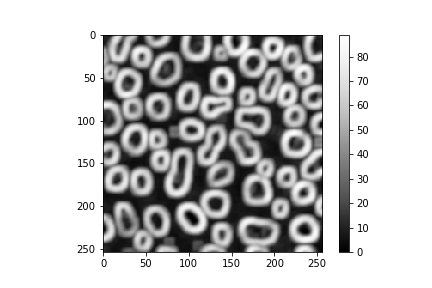
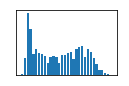

In [23]:
from napari_simpleitk_image_processing import standard_deviation_filter
standard_deviation_filter(blobs)

StackViewNDArray([[0., 0., 0., ..., 0., 0., 0.],
                  [0., 0., 0., ..., 0., 0., 0.],
                  [0., 0., 0., ..., 0., 0., 0.],
                  ...,
                  [0., 0., 0., ..., 0., 0., 0.],
                  [0., 0., 0., ..., 0., 0., 0.],
                  [0., 0., 0., ..., 0., 0., 0.]])
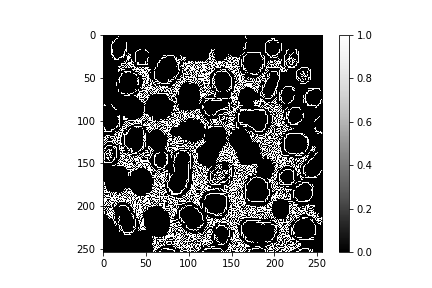
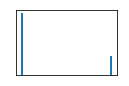

In [24]:
from napari_simpleitk_image_processing import canny_edge_detection
canny_edge_detection(blobs)

## Denoising

StackViewNDArray([[ 37,  36,  36, ..., 218, 215, 215],
                  [ 39,  37,  36, ..., 220, 218, 217],
                  [ 41,  39,  36, ..., 222, 220, 220],
                  ...,
                  [ 71,  71,  70, ...,  51,  50,  50],
                  [ 73,  72,  71, ...,  51,  50,  50],
                  [ 76,  74,  72, ...,  51,  50,  50]], dtype=uint8)
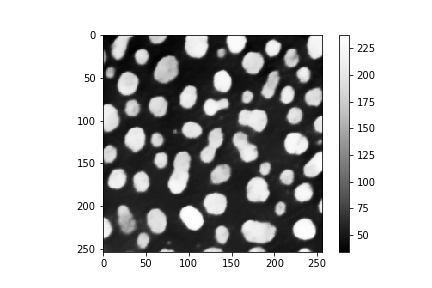
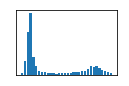

In [25]:
from napari_simpleitk_image_processing import bilateral_filter
bilateral_filter(blobs, radius=10)

StackViewNDArray([[ 35.56551057,  35.44926425,  35.11150529, ...,
                   234.76304854, 233.30590651, 232.47789577],
                  [ 35.77709637,  35.66327957,  35.33025724, ...,
                   234.81736018, 233.39808796, 232.5916992 ],
                  [ 36.38108298,  36.27299886,  35.95061471, ...,
                   234.92220963, 233.60844849, 232.86229297],
                  ...,
                  [ 71.83095413,  71.56104291,  70.77635546, ...,
                    48.27590613,  48.27687207,  48.29621387],
                  [ 73.42920327,  73.14246398,  72.30886172, ...,
                    48.23916006,  48.20239439,  48.20279823],
                  [ 74.27138061,  73.97581503,  73.11661364, ...,
                    48.21797925,  48.16105336,  48.15146728]])
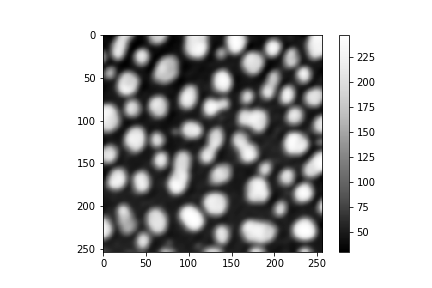
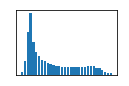

In [26]:
from napari_simpleitk_image_processing import binominal_blur_filter
binominal_blur_filter(blobs, repetitions=20)

StackViewNDArray([[ 33.94403645,  33.72513409,  33.4730825 , ...,
                   234.73522629, 234.61940792, 234.26080718],
                  [ 33.76078454,  33.6233714 ,  33.46185751, ...,
                   234.61797296, 234.64955635, 234.61247859],
                  [ 33.59095341,  33.52604048,  33.43444125, ...,
                   234.40850075, 234.5806033 , 234.63231801],
                  ...,
                  [ 71.96102783,  71.21219893,  69.99962524, ...,
                    48.        ,  48.        ,  48.        ],
                  [ 74.26007076,  73.31680089,  71.78763889, ...,
                    48.        ,  48.        ,  48.        ],
                  [ 75.34714271,  74.3548973 ,  72.70641688, ...,
                    48.        ,  48.        ,  48.        ]])
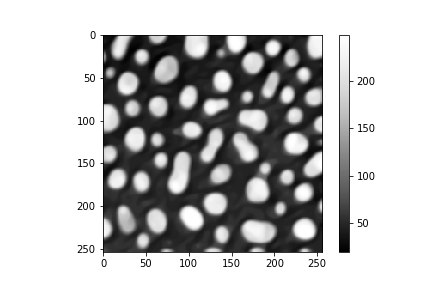
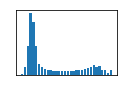

In [27]:
from napari_simpleitk_image_processing import curvature_flow_denoise
curvature_flow_denoise(blobs, number_of_iterations=150)

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [1, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [1, 0, 0, ..., 0, 0, 0]], dtype=uint32)
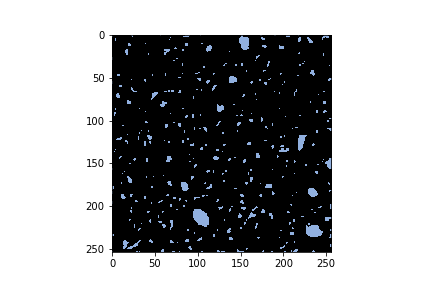

In [28]:
from napari_simpleitk_image_processing import regional_maxima
regional_maxima(blobs)

StackViewNDArray([[0, 0, 0, ..., 0, 1, 1],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
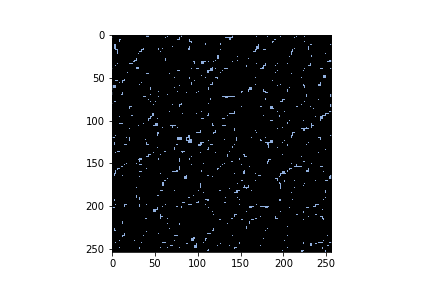

In [29]:
from napari_simpleitk_image_processing import regional_minima
regional_minima(blobs)

## Deconvolution

StackViewNDArray([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                   0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                   0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                   0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                   0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
                  [0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                   0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                   0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                   0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                   0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
                  [0.00000000e+00, 0.00000000e+00, 2.07316370e-05,
                   7.40342327e-05, 2.18156257e-04, 5.10346748e-04,
                   8.98618592e-04, 1.10942581e-03, 8.98618592e-04,
                   5.10346748e-04, 2.18156257e-04, 7.40342327e-05,
                   2.07316370e-05, 0.00000000e+00, 0.00000000e+00],
                  [0.00000000e+00, 0.00000000e+00, 7.40342327e-05,
                   2.64381805e-04, 7.79052380e-04, 1.82248657e-03,
                   3.20903448e-03, 3.96184288e-03, 3.20903448e-03,
                   1.82248657e-03, 7.79052380e-04, 2.64381805e-04,
                   7.40342327e-05, 0.00000000e+00, 0.00000000e+00],
                  [0.00000000e+00, 0.00000000e+00, 2.18156257e-04,
                   7.79052380e-04, 2.29562927e-03, 5.37031092e-03,
                   9.45604388e-03, 1.16743402e-02, 9.45604388e-03,
                   5.37031092e-03, 2.29562927e-03, 7.79052380e-04,
                   2.18156257e-04, 0.00000000e+00, 0.00000000e+00],
                  [0.00000000e+00, 0.00000000e+00, 5.10346748e-04,
                   1.82248657e-03, 5.37031092e-03, 1.25631084e-02,
                   2.21211222e-02, 2.73105232e-02, 2.21211222e-02,
                   1.25631084e-02, 5.37031092e-03, 1.82248657e-03,
                   5.10346748e-04, 0.00000000e+00, 0.00000000e+00],
                  [0.00000000e+00, 0.00000000e+00, 8.98618592e-04,
                   3.20903448e-03, 9.45604388e-03, 2.21211222e-02,
                   3.89508737e-02, 4.80883713e-02, 3.89508737e-02,
                   2.21211222e-02, 9.45604388e-03, 3.20903448e-03,
                   8.98618592e-04, 0.00000000e+00, 0.00000000e+00],
                  [0.00000000e+00, 0.00000000e+00, 1.10942581e-03,
                   3.96184288e-03, 1.16743402e-02, 2.73105232e-02,
                   4.80883713e-02, 5.93694372e-02, 4.80883713e-02,
                   2.73105232e-02, 1.16743402e-02, 3.96184288e-03,
                   1.10942581e-03, 0.00000000e+00, 0.00000000e+00],
                  [0.00000000e+00, 0.00000000e+00, 8.98618592e-04,
                   3.20903448e-03, 9.45604388e-03, 2.21211222e-02,
                   3.89508737e-02, 4.80883713e-02, 3.89508737e-02,
                   2.21211222e-02, 9.45604388e-03, 3.20903448e-03,
                   8.98618592e-04, 0.00000000e+00, 0.00000000e+00],
                  [0.00000000e+00, 0.00000000e+00, 5.10346748e-04,
                   1.82248657e-03, 5.37031092e-03, 1.25631084e-02,
                   2.21211222e-02, 2.73105232e-02, 2.21211222e-02,
                   1.25631084e-02, 5.37031092e-03, 1.82248657e-03,
                   5.10346748e-04, 0.00000000e+00, 0.00000000e+00],
                  [0.00000000e+00, 0.00000000e+00, 2.18156257e-04,
                   7.79052380e-04, 2.29562927e-03, 5.37031092e-03,
                   9.45604388e-03, 1.16743402e-02, 9.45604388e-03,
                   5.37031092e-03, 2.29562927e-03, 7.79052380e-04,
                   2.18156257e-04, 0.00000000e+00, 0.00000000e+00],
                  [0.00000000e+00, 0.00000000e+00, 7.40342327e-05,
                   2.64381805e-04, 7.79052380e-04, 1.82248657e-03,
                   3.20903448e-03, 3.96184288e-03, 3.20903448e-03,
                   1.82248657e-03, 7.79052380e-04, 2.64381805e-04,
                   7.40342327e-05, 0
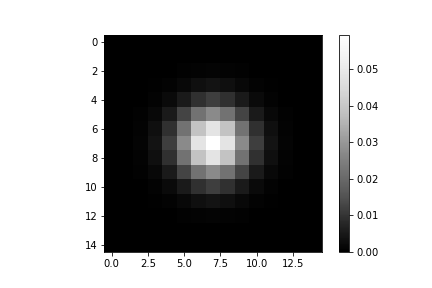
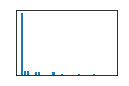

In [30]:
kernel = np.zeros((15, 15))
kernel[7,7] = 1
kernel = gaussian_blur(kernel, variance_x=3, variance_y=3)
kernel

StackViewNDArray([[ 45.21888842,  28.40745988,  15.56316171, ...,
                   209.05299903, 186.06174955, 185.75843001],
                  [ 78.83499672,  41.10743217,  17.07381366, ...,
                   231.6574626 , 209.78571618, 210.08219484],
                  [ 85.41227997,  49.46027882,  18.80945104, ...,
                   246.89970486, 234.52517919, 235.39056835],
                  ...,
                  [ 66.833757  ,  80.28872321,  85.51754843, ...,
                    47.46732573,  46.98057148,  46.80486982],
                  [ 81.5418398 ,  83.90017707,  85.50227045, ...,
                    46.99018277,  46.71704773,  46.79099101],
                  [106.11798133,  94.8805737 ,  83.60286257, ...,
                    46.5839925 ,  46.2612504 ,  46.33168352]])
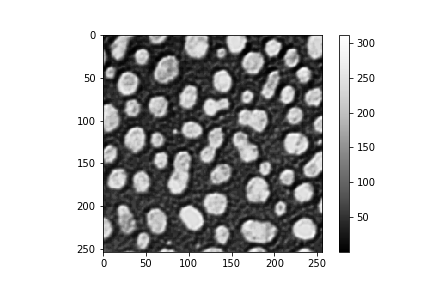
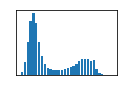

In [31]:
from napari_simpleitk_image_processing import richardson_lucy_deconvolution
richardson_lucy_deconvolution(blobs, kernel)

StackViewNDArray([[-282.15898438,   31.00324083,  215.94295243, ...,
                   -238.50447702, -287.96869466,   65.75839513],
                  [ -46.60084432,  127.32297714,   87.85668595, ...,
                     33.24427366,   56.64521664,  381.09218915],
                  [ 134.17044915,  204.76059082,   -1.2140555 , ...,
                    474.89715236,  514.74316813,  812.00640006],
                  ...,
                  [ 122.83915242,   81.40347092,  167.21968196, ...,
                   -226.19994352, -216.68062688, -258.07631142],
                  [  98.92410722,  -34.12852887,  -45.6098843 , ...,
                    232.39302838,  174.41611457,   82.38215685],
                  [ 251.38450948,   61.91539996,  -38.52004615, ...,
                    350.1181374 ,  274.09824019,  177.74096503]])
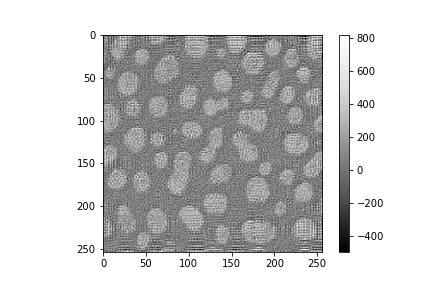
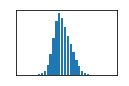

In [32]:
from napari_simpleitk_image_processing import wiener_deconvolution
wiener_deconvolution(blobs, kernel)

StackViewNDArray([[ 29.01154122,  23.6140486 ,  18.00074571, ...,
                   146.63864839, 139.87132845, 136.22098666],
                  [ 31.89447064,  26.06420015,  20.34787576, ...,
                   152.06869429, 146.54843819, 143.54681091],
                  [ 31.02255474,  26.48311344,  22.44900235, ...,
                   157.33432011, 153.0791558 , 150.75019306],
                  ...,
                  [ 50.18113735,  51.36461025,  51.75300725, ...,
                    31.93209688,  31.81884335,  31.70712541],
                  [ 55.25573572,  54.93880886,  53.94386725, ...,
                    32.05873917,  31.96703391,  31.87416646],
                  [ 59.86631614,  57.8587214 ,  55.27175791, ...,
                    32.30253104,  32.23246445,  32.14971347]])
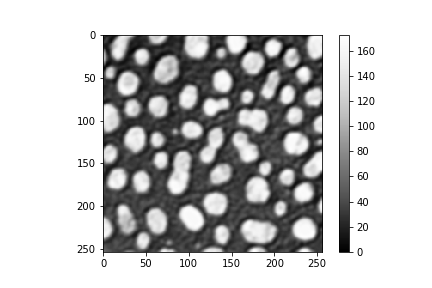
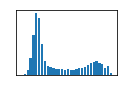

In [33]:
from napari_simpleitk_image_processing import tikhonov_deconvolution
tikhonov_deconvolution(blobs, kernel, regularization_constant=0.5)

## Background / foreground removal

StackViewNDArray([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
                  [16.,  8.,  0., ..., 32., 16.,  0.],
                  [24., 24.,  8., ..., 40., 32.,  0.],
                  ...,
                  [ 0.,  8.,  8., ...,  0.,  0.,  0.],
                  [ 0.,  0.,  8., ...,  0.,  0.,  0.],
                  [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
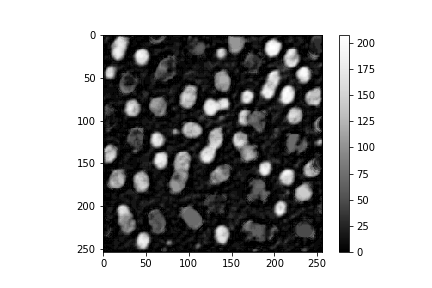
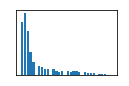

In [34]:
from napari_simpleitk_image_processing import white_top_hat
white_top_hat(blobs)

StackViewNDArray([[ 0.,  0.,  8., ...,  0.,  0.,  0.],
                  [ 0.,  0.,  8., ...,  0.,  0.,  0.],
                  [ 0.,  8., 16., ...,  0.,  0.,  0.],
                  ...,
                  [ 0.,  0.,  0., ...,  0.,  0.,  0.],
                  [ 0.,  0.,  0., ...,  0.,  0.,  0.],
                  [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
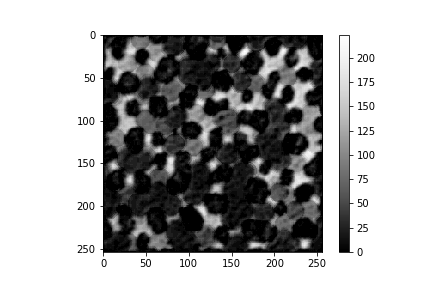
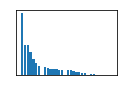

In [35]:
from napari_simpleitk_image_processing import black_top_hat
black_top_hat(blobs)

StackViewNDArray([[ 32,  32,  24, ..., 148, 148, 148],
                  [ 32,  32,  24, ..., 148, 148, 148],
                  [ 32,  32,  24, ..., 148, 148, 148],
                  ...,
                  [ 56,  56,  56, ...,  48,  48,  48],
                  [ 56,  56,  56, ...,  48,  48,  48],
                  [ 56,  56,  56, ...,  48,  48,  48]], dtype=uint8)
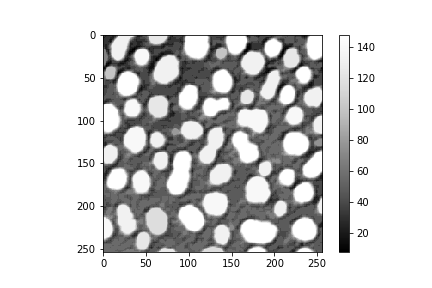
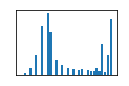

In [36]:
from napari_simpleitk_image_processing import h_maxima
h_maxima(blobs, height=100)

StackViewNDArray([[108, 108, 108, ..., 232, 232, 232],
                  [108, 108, 108, ..., 232, 232, 232],
                  [108, 108, 108, ..., 240, 232, 232],
                  ...,
                  [108, 108, 108, ..., 108, 108, 108],
                  [108, 108, 108, ..., 108, 108, 108],
                  [108, 108, 108, ..., 108, 108, 108]], dtype=uint8)
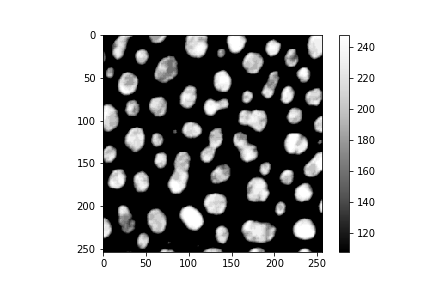
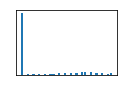

In [37]:
from napari_simpleitk_image_processing import h_minima
h_minima(blobs, height=100)

## Other filters

StackViewNDArray([[0.13333333, 0.1       , 0.06666667, ..., 0.86666667,
                   0.8       , 0.8       ],
                  [0.2       , 0.13333333, 0.06666667, ..., 0.93333333,
                   0.86666667, 0.86666667],
                  [0.23333333, 0.16666667, 0.06666667, ..., 0.96666667,
                   0.93333333, 0.93333333],
                  ...,
                  [0.26666667, 0.3       , 0.3       , ..., 0.16666667,
                   0.16666667, 0.16666667],
                  [0.3       , 0.3       , 0.3       , ..., 0.16666667,
                   0.16666667, 0.16666667],
                  [0.36666667, 0.33333333, 0.3       , ..., 0.16666667,
                   0.16666667, 0.16666667]])
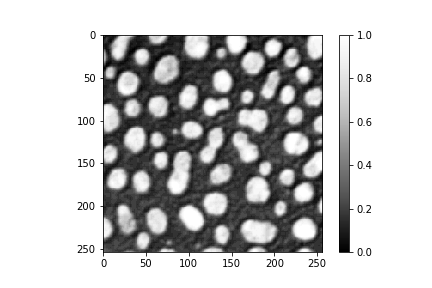
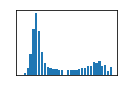

In [38]:
from napari_simpleitk_image_processing import rescale_intensity
rescaled = rescale_intensity(blobs)

rescaled

StackViewNDArray([[119.50977373,  87.56177064,  55.30237745, ...,
                    96.89270529,  79.79918119,  80.82263557],
                  [161.23418447, 115.59380895,  53.4020973 , ...,
                   132.19622123,  97.83247995,  99.80753282],
                  [173.72644923, 139.67014505,  51.82205108, ...,
                   175.00137272, 138.17574745, 141.85426313],
                  ...,
                  [124.81910604, 158.90641677, 161.15876581, ...,
                   104.79459468, 103.09188644, 102.94053513],
                  [153.06771667, 156.20188299, 158.7294625 , ...,
                   103.99999856, 101.92431687, 101.5783686 ],
                  [182.90615321, 173.21626885, 155.61706799, ...,
                   106.11892293, 103.99999837, 103.99999746]])
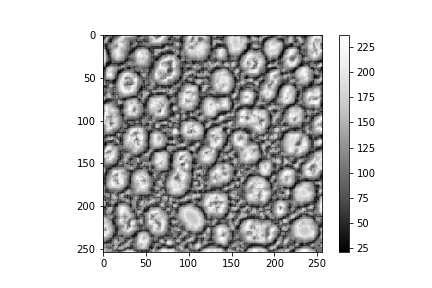
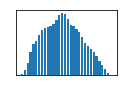

In [39]:
from napari_simpleitk_image_processing import adaptive_histogram_equalization
adaptive_histogram_equalization(blobs, radius_x=5, radius_y=5)

StackViewNDArray([[215, 223, 231, ...,  39,  55,  55],
                  [199, 215, 231, ...,  23,  39,  39],
                  [191, 207, 231, ...,  15,  23,  23],
                  ...,
                  [183, 175, 175, ..., 207, 207, 207],
                  [175, 175, 175, ..., 207, 207, 207],
                  [159, 167, 175, ..., 207, 207, 207]], dtype=uint8)
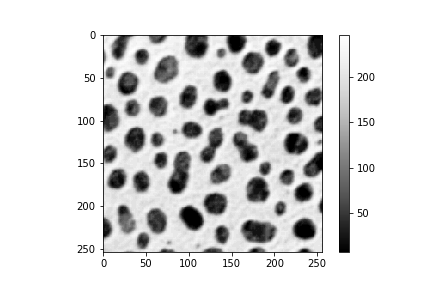
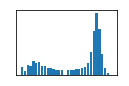

In [40]:
from napari_simpleitk_image_processing import invert_intensity
invert_intensity(blobs)